In [1]:
import numpy as np
import sys
import pickle
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/cheekoti/mpinb/github/FeatDEM/')
from FeatDEM import core as feat_core

In [2]:
data_context = feat_core.DrawingContext()
data_pkl = "/home/cheekoti/Desktop/4pi_back_CADD19.feats.pickle"

with open(data_pkl, "rb") as feat_file:
    temp = pickle.load(feat_file)
    video_file = temp.get('video_url', None)

data_context.add_recording(video_file)
data_context.load_data(data_pkl)
data_context.init_db()

Current software version: 1.3.0, eye file version: 1.3.0


In [3]:
det_frames = data_context.get_available_subsets()['Detected'][1:]
detector = data_context.detectors[0]
detector_id = 'CV2SIFT'

features_list = []

tag_data_dict = data_context.get_current_tagged_data()
for frame_idx in det_frames:
    data_context.set_current_frame(frame_idx)

    frame = data_context.get_current_frame(frame_idx)
    for tag, tag_dict in tag_data_dict.items():
        if frame_idx in tag_dict:
            for kp_id in tag_dict[frame_idx].get(detector_id, []):
                feature = data_context.id_2feature(kp_id, detector_id)
                feature = detector.get_orig_feature(feature)

                color = frame[round(feature['pt_y']), round(feature['pt_x'])]

                feature['R'] = color[0]
                feature['G'] = color[1]
                feature['B'] = color[2]
                feature['tag'] = tag
                feature['descriptor'] = np.squeeze(feature['descriptor'])

                del feature['class_id']
                del feature['octave']
                del feature['orig_index']
                del feature['score']
                del feature['extras']
                del feature['frame_index']

                features_list.append(feature)

In [4]:
features_df = pd.DataFrame(features_list)
features_df.set_index('uid', inplace=True)
features_df

,pt_x,pt_y,descriptor,angle,response,size,R,G,B,tag
uid,,,,,,,,,,
CV2SIFT_06356dfd28774eeea1c8995c5687a954,828.562500,727.706177,"[0, 0, 0, 66, 0, 0, 96, 66, 0, 0, 208, 66, 0, ...",340.788970947266,0.0390656664967537,1.93677997589111,199,200,205,trees
CV2SIFT_83e602173efd47d1b7eed49c247edc2b,631.824707,594.342346,"[0, 0, 156, 66, 0, 0, 148, 66, 0, 0, 208, 65, ...",297.306610107422,0.0392941609025002,4.9486403465271,111,125,135,trees
CV2SIFT_afd41234d58d4c3fb24ff3f8e268a14d,648.018127,634.091675,"[0, 0, 64, 66, 0, 0, 162, 66, 0, 0, 32, 65, 0,...",327.325225830078,0.0458993688225746,4.46993589401245,230,245,250,trees
CV2SIFT_b841518beb3d48739652a2f2324a384b,951.286438,776.399780,"[0, 0, 136, 65, 0, 0, 192, 64, 0, 0, 128, 64, ...",272.295074462891,0.0459522008895874,26.1822967529297,64,64,64,trees
CV2SIFT_3acd9cb82e42475a8c9a5b518e73647f,987.992859,748.459351,"[0, 0, 142, 66, 0, 0, 144, 66, 0, 0, 240, 65, ...",267.898681640625,0.0357565991580486,2.71228289604187,138,140,123,trees
...,...,...,...,...,...,...,...,...,...,...
CV2SIFT_711667a5e25e4ca7a49aa277306de051,945.454651,992.273987,"[0, 0, 128, 64, 0, 0, 232, 65, 0, 0, 64, 66, 0...",51.500301361084,0.0201424472033978,9.88374996185303,107,112,118,wires
CV2SIFT_e5812930388d4946bd2db2124b96fc1c,930.272278,948.222351,"[0, 0, 230, 66, 0, 0, 224, 64, 0, 0, 160, 64, ...",322.680999755859,0.0190704595297575,6.23219060897827,114,121,135,wires
CV2SIFT_c3bc0bf1498e4db3a253d1e92a1037ec,1309.951172,359.116425,"[0, 0, 224, 65, 0, 0, 128, 64, 0, 0, 0, 0, 0, ...",275.953857421875,0.059453334659338,324.062347412109,189,231,251,sky


In [5]:
descriptor_df = pd.DataFrame(features_df['descriptor'].tolist(),
                             columns=[f"des_{i}" for i in range(512)],
                             index=features_df.index)

thresh = features_df.shape[0] // 200

non_zero_count = (descriptor_df  != 0).sum()
zero_columns = non_zero_count[non_zero_count <= thresh].index
print(f"Discarding {len(zero_columns)} descriptor columns")

descriptor_df = descriptor_df.drop(columns=zero_columns)
descriptor_df

Discarding 256 descriptor columns


,des_2,des_3,des_6,des_7,des_10,des_11,des_14,des_15,des_18,des_19,...,des_494,des_495,des_498,des_499,des_502,des_503,des_506,des_507,des_510,des_511
uid,,,,,,,,,,,,,,,,,,,,,
CV2SIFT_06356dfd28774eeea1c8995c5687a954,0,66,96,66,208,66,108,66,0,0,...,0,0,0,0,0,0,0,0,0,0
CV2SIFT_83e602173efd47d1b7eed49c247edc2b,156,66,148,66,208,65,160,64,0,0,...,0,0,0,0,0,0,0,0,224,64
CV2SIFT_afd41234d58d4c3fb24ff3f8e268a14d,64,66,162,66,32,65,0,0,0,0,...,144,65,0,0,0,0,0,0,0,64
CV2SIFT_b841518beb3d48739652a2f2324a384b,136,65,192,64,128,64,64,64,0,0,...,92,66,8,66,16,65,224,65,52,66
CV2SIFT_3acd9cb82e42475a8c9a5b518e73647f,142,66,144,66,240,65,224,64,64,64,...,68,66,28,66,216,65,232,65,160,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CV2SIFT_711667a5e25e4ca7a49aa277306de051,128,64,232,65,64,66,192,65,224,64,...,0,0,240,65,174,66,224,64,128,63
CV2SIFT_e5812930388d4946bd2db2124b96fc1c,230,66,224,64,160,64,224,65,80,65,...,160,65,52,66,224,64,48,65,168,65
CV2SIFT_c3bc0bf1498e4db3a253d1e92a1037ec,224,65,128,64,0,0,0,0,0,0,...,0,64,0,0,0,0,0,0,0,0


In [6]:
#features_df = features_df.join(descriptor_df)
features_df.drop(columns='descriptor', inplace=True)

features_df = features_df.sample(frac=1, random_state=3)
#print(features_df.columns, features_df.shape)
features_df

,pt_x,pt_y,angle,response,size,R,G,B,tag
uid,,,,,,,,,
CV2SIFT_e2406b21438e43c9926387436f554767,707.411560,514.704407,278.830902099609,0.0350609607994556,7.35008764266968,98,93,90,wires
CV2SIFT_e6e8514412324c04a4d77bb07d550361,1029.732788,501.188843,278.723419189453,0.0391080155968666,80.2338256835938,73,71,69,trees
CV2SIFT_9f53f4aa699b47908e7973105ee0c9b2,993.072815,382.535919,297.182250976563,0.045269638299942,54.777961730957,248,247,250,sky
CV2SIFT_24b9333fdeee400eb0b41edfd4406a94,614.995483,419.050995,55.5832099914551,0.0320579409599304,2.45342040061951,151,153,153,trees
CV2SIFT_1b0f1cc6035b43ca94a384eeff4aed6a,639.932190,283.906097,1.01947784423828,0.0250345394015312,2.65300726890564,92,110,107,trees
...,...,...,...,...,...,...,...,...,...
CV2SIFT_55e3c681140147d0bfb0b755aeeaa11a,1212.946777,561.362061,153.000671386719,0.048002228140831,2.97962427139282,170,180,198,trees
CV2SIFT_924ce1b4502744afb956cd57bf4c1052,627.956238,435.934296,178.998870849609,0.0455682091414928,2.64014101028442,181,191,188,trees
CV2SIFT_7b5c4574e1e24e6db58fd24ffb7a2e4f,596.658142,454.869537,271.641204833984,0.033507339656353,4.86616468429565,69,91,93,trees


In [7]:
X = features_df.drop(columns=['tag']).to_numpy()
column_names = features_df.drop(columns=['tag']).columns.tolist()

y = features_df['tag'].to_numpy()
y = np.where(y == 'trees', 1, 0)

print(X.shape, y.shape, np.unique_counts(y))

(1304, 8) (1304,) UniqueCountsResult(values=array([0, 1]), counts=array([576, 728]))


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score


In [9]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state=3)

In [20]:
# Use a fixed random_state for reproducibility
model = RandomForestClassifier(n_estimators=100, random_state=3, oob_score=accuracy_score)
model.fit(X_train, y_train) #, sample_weight=arr_weights)
y_predict = model.predict(X_test)

print("Hold-out precision:", precision_score(y_test, y_predict))

cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=3,
    n_jobs=10,
    scoring='precision',

)
print("CV fold accuracies:", cv_scores)
print("CV mean accuracy:", cv_scores.mean())


Hold-out precision: 0.9456066945606695
CV fold accuracies: [0.94979079 0.95299145 0.97890295]
CV mean accuracy: 0.9605617338523434


In [12]:
importances = model.feature_importances_
feature_df = pd.DataFrame({'Feature': column_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
feature_df

,Feature,Importance
0,pt_x,0.255504
1,pt_y,0.186203
4,size,0.145103
7,B,0.104329
6,G,0.100088
3,response,0.072454
2,angle,0.068583
5,R,0.067736


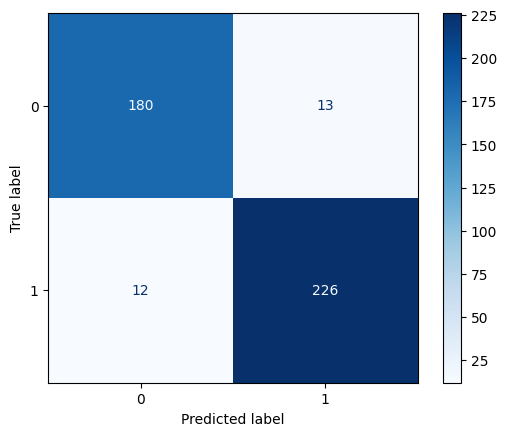

In [18]:
cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

In [15]:
param_grid_dict = {
    'n_estimators': [50, 100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid_dict, cv=3, n_jobs=15, scoring='accuracy')
grid.fit(X, y)

,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,15
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


<ErrorbarContainer object of 3 artists>

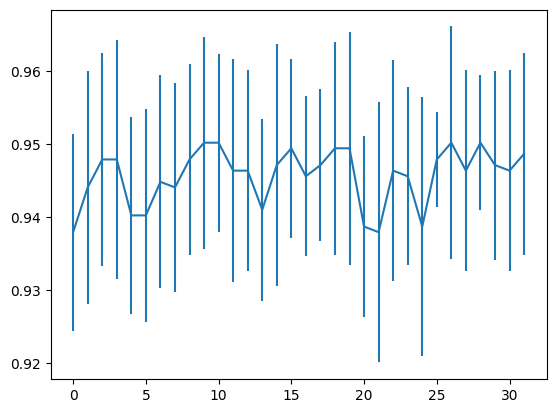

In [16]:
plt.errorbar(x=range(len(grid.cv_results_['mean_test_score'])),
             y=grid.cv_results_['mean_test_score'],
             yerr=grid.cv_results_['std_test_score'])